<a href="https://colab.research.google.com/github/weltonlopesdev/A3---Algoritimo-KMeans/blob/main/Clustering_Kmeans_A3_PIZZA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
MACHINE LEARN - UTILIZANDO O ALGORITIMO K.MEANS





# Importando as bibliotecas necessárias

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DataModelPizzaSales.xlsx')

In [ ]:
data.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# SEGMENTAÇÃO 1 { CATEGORIA X INGREDIENTES }
# Realizando o agrupamento dos valores dos ingredientes x categoria




**Codificando as colunas que serão utilizadas**

> Para as Categorias foi utilizado o OneHotEncoder

> Para as categorias foi utilizado o TfidfVectorizer





In [ ]:
# Codificação One-Hot para a coluna "pizza_category"
encoder = OneHotEncoder()
pizza_category_encoded = encoder.fit_transform(data[['pizza_category']]).toarray()

# Codificação TF-IDF para a coluna "pizza_ingredients"
vectorizer = TfidfVectorizer()
pizza_ingredients_encoded = vectorizer.fit_transform(data['pizza_ingredients'])

# Combinando as colunas codificadas em um novo DataFrame
encoded_data = pd.DataFrame(pizza_category_encoded, columns=encoder.categories_[0])
encoded_data = pd.concat([encoded_data, pd.DataFrame(pizza_ingredients_encoded.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)


In [ ]:
encoded_data

,Chicken,Classic,Supreme,Veggie,alfredo,anchovies,artichoke,artichokes,arugula,asiago,...,soppressata,spinach,sun,sweet,thai,thyme,tomatoes,verdi,zucchini,慛duja
0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.203056,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.166225,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,1.0,0.0,0.0,0.0,0.558983,0.000000,0.0,0.0,0.0,0.41921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
48616,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
48617,0.0,1.0,0.0,0.0,0.000000,0.678334,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.235924,0.0,0.0,0.0
48618,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.166225,0.0,0.0,0.0


**Grafico ingrediente x categoria**

> Grafico abaixo mostrando a quantidade de ingredientes de acordo com sua categoria



<ipython-input-8-d80e92a93085>:27: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


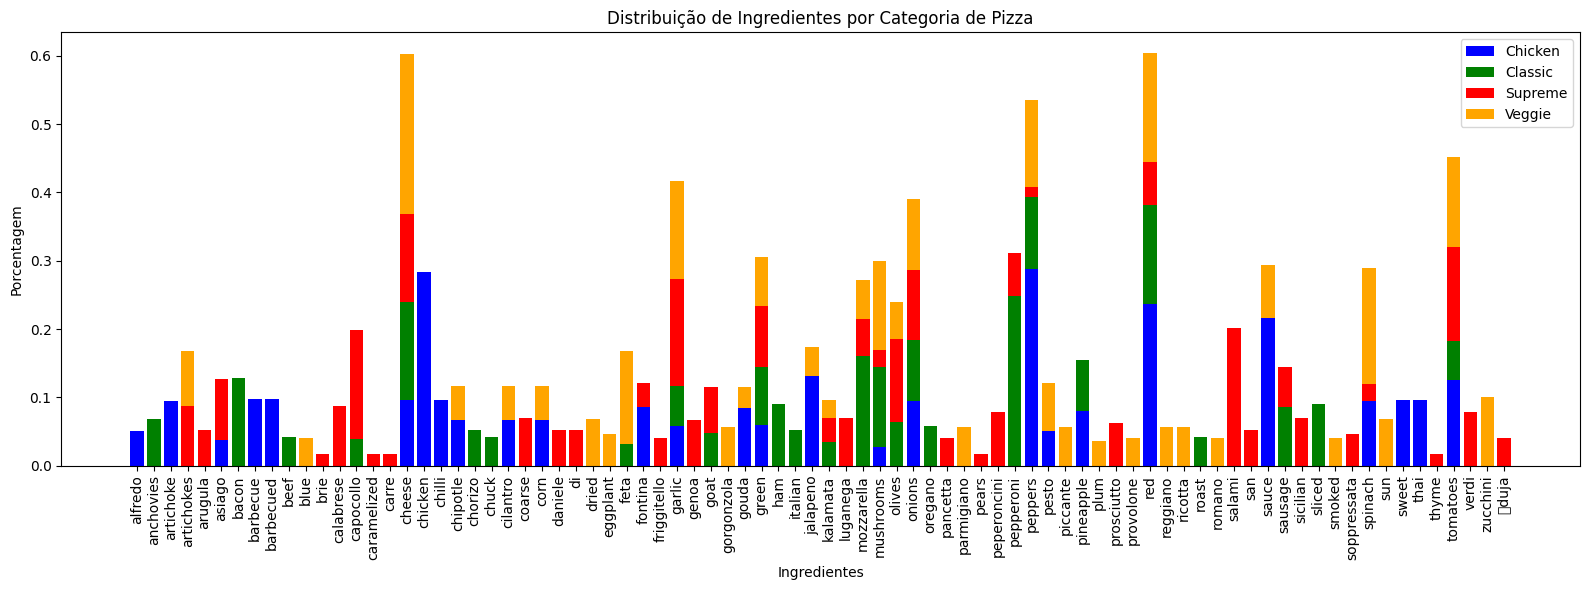

In [ ]:
# Cálculo das porcentagens dos ingredientes
ingredient_percentages = encoded_data.groupby(data['pizza_category']).mean().loc[:, vectorizer.get_feature_names_out()]

# Configuração do gráfico
categories = ['Chicken', 'Classic', 'Supreme', 'Veggie']
colors = ['blue', 'green', 'red', 'orange']
fig, ax = plt.subplots(figsize=(16, 6))  # Ajuste a largura (10) e a altura (6) conforme necessário

# Plotagem das barras empilhadas
bottom = None
for i, category in enumerate(categories):
    values = ingredient_percentages.loc[category]
    ax.bar(ingredient_percentages.columns, values, bottom=bottom, color=colors[i], label=category)
    if bottom is None:
        bottom = values
    else:
        bottom += values

# Configuração dos eixos e legenda
ax.set_xlabel('Ingredientes')
ax.set_ylabel('Porcentagem')
ax.set_title('Distribuição de Ingredientes por Categoria de Pizza')
ax.legend()

# Ajuste do espaçamento entre as barras
plt.xticks(rotation=90)
plt.tight_layout()

# Exibição do gráfico
plt.show()

**Padronizando os dados do dataframe:**

> transforma os valores para que tenham uma média de 0 e um desvio padrão de 1



In [ ]:
# Aplicar a padronização (Z-score)
scaler = StandardScaler()
data_scaled_SEG1 = scaler.fit_transform(encoded_data)


In [ ]:
data_scaled_SEG1

array([[-0.53485818,  1.52804902, -0.56537922, ..., -0.20094357,
        -0.23186228, -0.13941598],
       [-0.53485818,  1.52804902, -0.56537922, ..., -0.20094357,
        -0.23186228, -0.13941598],
       [-0.53485818, -0.65442927, -0.56537922, ..., -0.20094357,
        -0.23186228, -0.13941598],
       ...,
       [-0.53485818,  1.52804902, -0.56537922, ..., -0.20094357,
        -0.23186228, -0.13941598],
       [-0.53485818, -0.65442927, -0.56537922, ..., -0.20094357,
        -0.23186228, -0.13941598],
       [ 1.8696545 , -0.65442927, -0.56537922, ..., -0.20094357,
        -0.23186228, -0.13941598]])

**Normalização dos dados:**

>  Dimensiona os valores de cada atributo para um intervalo específico, geralmente entre 0 e 1.



In [ ]:
# Aplicar a normalização min-max
min_max_scaler = MinMaxScaler()
data_normalized_SEG1 = min_max_scaler.fit_transform(data_scaled_SEG1)

In [ ]:
data_normalized_SEG1

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

**Curva de Elbow:**

> Determinar o número ideal de clusters usando o algoritmo K-means,



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

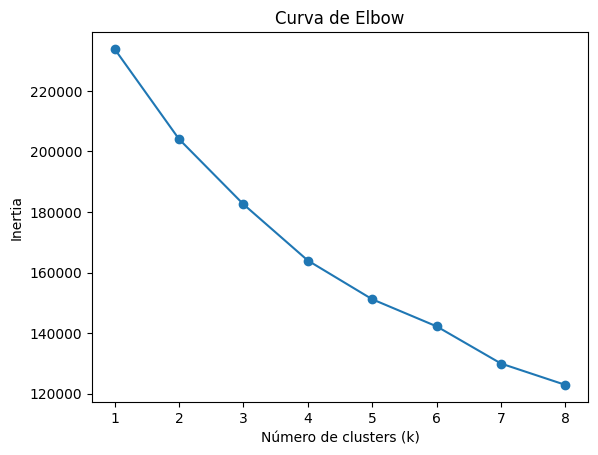

In [ ]:
# Lista vazia para armazenar as inércias
inertias = []

# Testar diferentes valores de k (número de clusters)
for k in range(1, 9):
    # Criar uma instância do KMeans com o número de clusters desejado
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Ajustar o modelo aos dados normalizados
    kmeans.fit(data_normalized_SEG1)
    # Obter a inércia e adicioná-la à lista
    inertias.append(kmeans.inertia_)

# Plotar a curva de elbow
plt.plot(range(1, 9), inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Curva de Elbow')
plt.show()

In [ ]:
# Definir o número de clusters
n_clusters = 4

# Criar uma instância do KMeans com o número de clusters desejado
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [ ]:
# Treinar o modelo com os dados normalizados
kmeans.fit(data_normalized_SEG1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

**Rotulos:**

> Os rótulos indicam a qual cluster cada amostra pertence. Cada amostra é atribuída a um cluster específico com base na sua proximidade com os centróides. 



In [ ]:
# Obter os rótulos de cluster para cada amostra
labels = kmeans.labels_

**Centroids:**

> Os centróides representam os pontos médios de cada cluster. Eles são calculados com base nas amostras atribuídas a cada cluster.



In [ ]:
# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_

**Silhueta:**

> A pontuação de silhueta é uma métrica utilizada para avaliar a coesão e separação dos clusters. Ela varia de -1 a 1


In [ ]:
# Calcular a pontuação de silhueta
silhouette_avg = silhouette_score(data_normalized_SEG1, labels)

# Imprimir a pontuação de silhueta média
print(f"Pontuação de silhueta média: {silhouette_avg}")

Pontuação de silhueta média: 0.2345972449672994


**PCA:**

> Reduzir a dimensão dos dados para agrupamento



Dataframe normalizado e padronizado

In [ ]:
# Aplicar o PCA para reduzir a dimensionalidade dos dados
pca = PCA(n_components=2) #10 componentes principais mais importantes dos dados
data_pca = pca.fit_transform(data_normalized_SEG1)

**PLOT dos clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


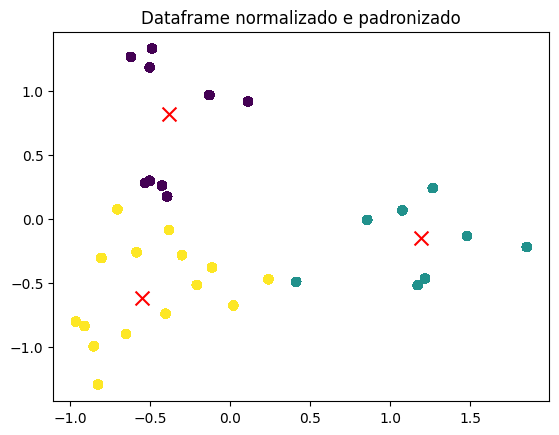

In [ ]:
# Aplicar o KMeans aos componentes principais
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_pca)

# Plotar o gráfico dos clusters com os valores dos pontos
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100)
plt.title('Dataframe normalizado e padronizado')
plt.show()

Dataframe encodado

**PLOT dos clusters**

In [ ]:
# Aplicar o PCA para reduzir a dimensionalidade dos dados
pca = PCA(n_components=10) #10 componentes principais mais importantes dos dados
data_pca = pca.fit_transform(encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


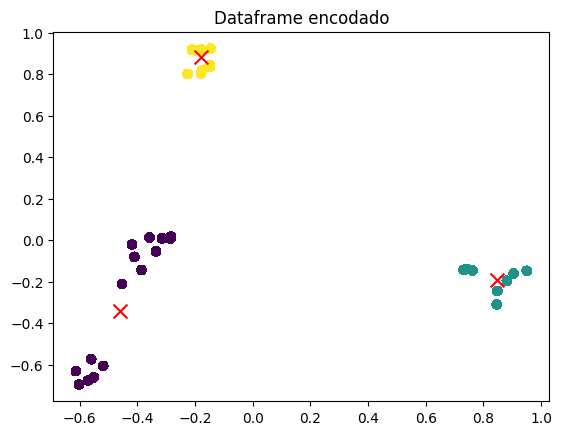

In [ ]:
# Aplicar o KMeans aos componentes principais
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_pca)

# Plotar o gráfico dos clusters com os valores dos pontos
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100)
plt.title('Dataframe encodado')
plt.show()

**TSNE:**

> Redução de dimensionalidade que preserva as relações de vizinhança dos dados originais em um espaço bidimensional



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


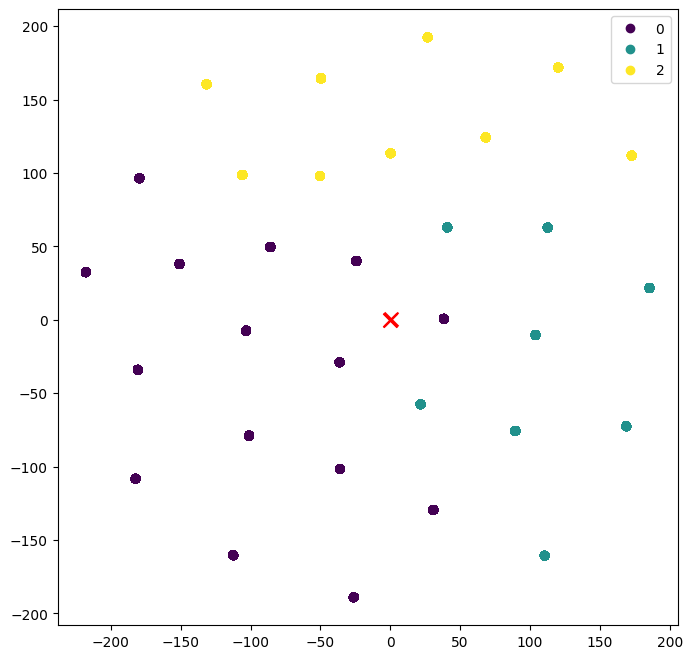

In [ ]:
# Reduzir a dimensionalidade usando t-SNE
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(encoded_data)

# Aplicar o K-means aos dados reduzidos
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)
centroids = kmeans.cluster_centers_

# Plotar os dados e os clusters
plt.figure(figsize=(8, 8))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis')

# Plotar os centroids
plt.scatter(centroids[:, 0], centroids[:, 3], color='red', marker='x', s=100, label='Centroids')

# Adicionar legenda dos clusters e centroids
plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1])

# Mostrar o gráfico
plt.show()